In [24]:
# section 1 load all the necessary modules and packages
import glob
import time
import netCDF4 as nc4 
import numpy as np
import pandas as pd
import xarray as xr
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import matplotlib
import warnings
import sys
import os
import platform
import shutil
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)


            date  water_level  error
0     1992-09-27     1135.000  0.000
1     1992-10-07     1135.023  0.001
2     1992-10-17     1135.032  0.000
3     1992-10-27     1134.958  0.000
4     1992-11-06     1135.035  0.000
...          ...          ...    ...
1075  2022-09-07     1135.759  0.001
1076  2022-09-17     1135.755  0.002
1077  2022-09-27     1135.730  0.000
1078  2022-10-07     1135.760  0.001
1079  2022-10-17     1135.682  0.001

[1080 rows x 3 columns]
            water_level  error
date                          
1992-09-27     1135.000  0.000
1992-10-07     1135.023  0.001
1992-10-17     1135.032  0.000
1992-10-27     1134.958  0.000
1992-11-06     1135.035  0.000
...                 ...    ...
2022-09-07     1135.759  0.001
2022-09-17     1135.755  0.002
2022-09-27     1135.730  0.000
2022-10-07     1135.760  0.001
2022-10-17     1135.682  0.001

[1080 rows x 2 columns]
     Unnamed: 0  HYP_Erate_emr  HYP_Qrate_emr  scale_factor_Ep_temp  \
972         972        1.46121  

Text(0.5, 0, 'Date')

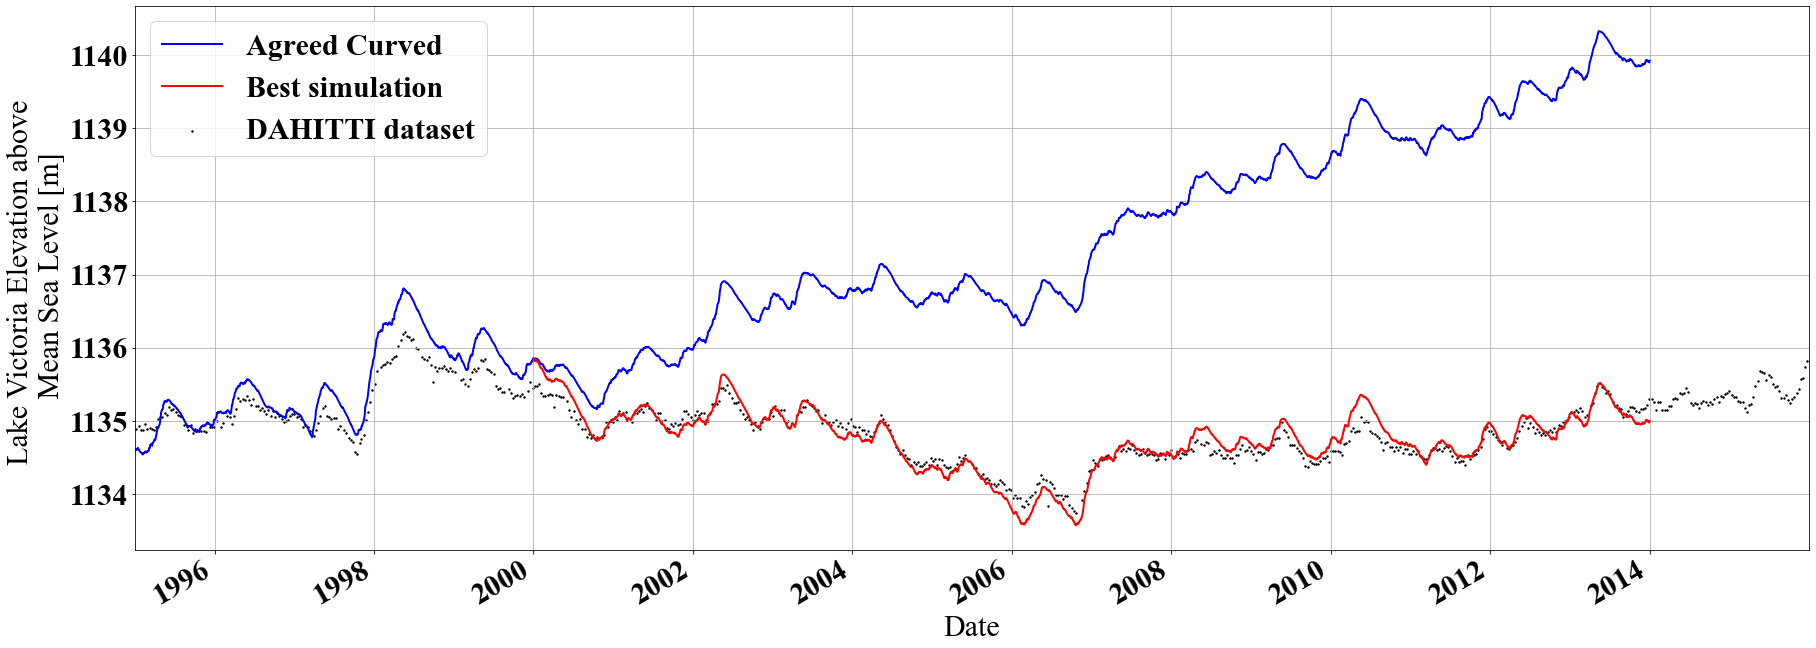

In [48]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 10))

start_year = '1995-01-01'
end_year   = '2015-12-31'

# get historial values with simulation
ds = xr.open_dataset('../mizuRoute_output_all/sim_hist.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='b', linewidth=2)

ds = xr.open_dataset('../mizuRoute_output_all/sim_00001.nc')
ds = ds.sel(time=slice(start_year,end_year))
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='b', label='Agreed Curved', linewidth=2)

# read the Dahitti data set
lake_elevation = pd.read_csv('../data/DAHITI_Data/Lake_Victoria.csv')
print(lake_elevation)
lake_elevation['date']  = pd.DatetimeIndex(lake_elevation['date'])
lake_elevation = lake_elevation.set_index('date')
print(lake_elevation)
plt.scatter(lake_elevation.index, lake_elevation['water_level'], s=2, label='DAHITTI dataset', c='k')

# find the best simulation based on NSE and plot
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')
obj_par = obj_par.sort_values(by='1_NSE')
obj_par
m = obj_par.head(1).index.item()+1
print(obj_par)
ds = xr.open_dataset('../mizuRoute_output_all/sim_'+str(m).zfill(5)+'.nc')
ds['ele_sim'] = ds['IRFvolume'].copy()
ds['ele_sim'][:] = ds['ele_sim'][:]/(68800*10**6)
ds['ele_sim'][:] = ds['ele_sim'][:] + 1122.86
ds['ele_sim'][:,1].plot(color='r', label='Best simulation', linewidth=2)


plt.xlim(pd.Timestamp(start_year), pd.Timestamp(end_year))
plt.grid()
plt.legend(loc=2)


plt.ylabel('Lake Victoria Elevation above \n Mean Sea Level [m]')
plt.xlabel('Date')


     Unnamed: 0  HYP_Erate_emr  HYP_Qrate_emr  scale_factor_Ep_temp  \
0             0        1.22401       76.22284               1.11786   
1             1        2.41331       65.41657               1.03743   
2             2        1.93746      156.54958               0.66343   
3             3        2.47895      190.37690               1.23988   
4             4        2.18340       95.16265               0.93887   
..          ...            ...            ...                   ...   
995         995        1.21107      160.01660               0.75342   
996         996        2.57057       60.35968               0.92334   
997         997        2.13378      118.02945               0.60614   
998         998        1.33406      169.67764               1.07218   
999         999        2.55152       90.62367               1.38479   

     scale_factor_P_temp       1_NSE      RMSE  
0                0.88091   77.268437  3.207776  
1                1.29456    5.134133  0.826869  


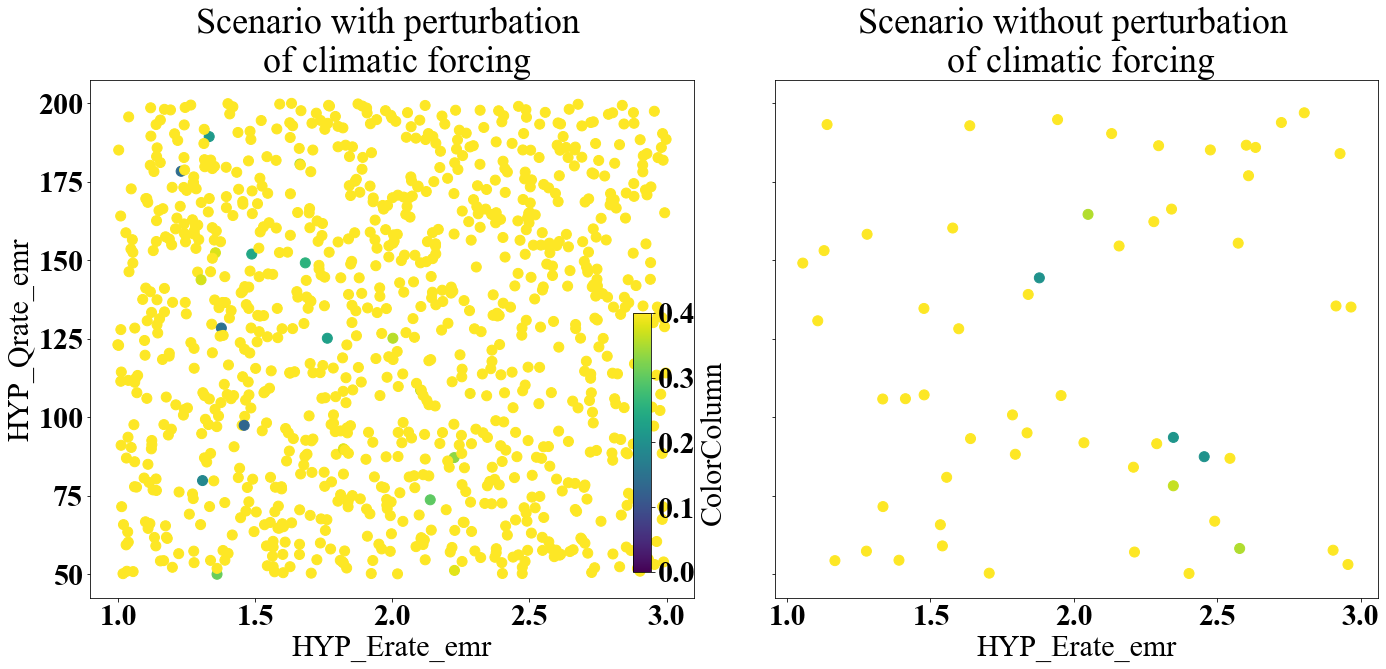

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
obj_par = pd.read_csv('../mizuRoute_output_all/obj_par.csv')

print(obj_par)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)  # sharey=True shares the y-axis

# Scatter plot on the first subplot
sc1 = axs[0].scatter(obj_par['HYP_Erate_emr'],\
                     obj_par['HYP_Qrate_emr'],\
                     c=obj_par['1_NSE'],\
                     s=100,
                     vmin=0,vmax=0.4)
axs[0].set_xlabel('HYP_Erate_emr')
axs[0].set_ylabel('HYP_Qrate_emr')
axs[0].set_title('Scenario with perturbation \n of climatic forcing')
cax1 = axs[0].inset_axes([0.90, 0.05, 0.03, 0.5])  # Define color bar axis
cbar1 = plt.colorbar(sc1, cax=cax1)
cbar1.set_label('ColorColumn')

# Scatter plot on the second subplot
obj_par2 = obj_par.copy()
obj_par2 = obj_par2[obj_par2['scale_factor_Ep_temp']<1.1]
obj_par2 = obj_par2[obj_par2['scale_factor_P_temp']<1.1]
obj_par2 = obj_par2[0.90<obj_par2['scale_factor_Ep_temp']]
obj_par2 = obj_par2[0.90<obj_par2['scale_factor_P_temp']]
axs[1].scatter(obj_par2['HYP_Erate_emr'],\
               obj_par2['HYP_Qrate_emr'],\
               c=obj_par2['1_NSE'],\
               s=100,
               vmin=0,vmax=1.0)
axs[1].set_xlabel('HYP_Erate_emr')
axs[1].set_title('Scenario without perturbation \n of climatic forcing')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
plt.colorbar()
